<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/2-drawing-with-2d-vectors/4_transforming_collections_of_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming collections of vectors

Collections of vectors store spatial data like drawings of dinosaurs regardless of what coordinate system we use: polar or Cartesian. It turns out that when we want to manipulate vectors, one coordinate system can be better than another. 

**We already saw that moving (or translating) a collection of vectors is easy with Cartesian coordinates.** It turns out to be much less natural in polar coordinates. Because polar coordinates have angles built in, these make it simple to carry out rotations.

**In polar coordinates, adding to the angle rotates a vector further counterclockwise, while subtracting from it rotates the vector clockwise.**

The polar coordinate (1, 2) is at distance 1 and at an angle of 2 radians. (Remember that we are working in radians if there is no degree symbol!) Starting with the angle 2 and adding or subtracting 1 takes
the vector either 1 radian counterclockwise or clockwise, respectively.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/adding-subtracting-angle-to-vector.png?raw=1' width='800'/>

Rotating a number of vectors simultaneously has the effect of rotating the figure these represent about the origin. The draw function only understands Cartesian coordinates, so we need to convert from polar to Cartesian before using it. Likewise, we have only seen how to rotate vectors in polar coordinates, so we need to convert Cartesian coordinates to polar coordinates before executing a rotation. 

## Setup

In [1]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py

--2021-01-04 13:07:13--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2021-01-04 13:07:13 (36.6 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [9]:
from math import sqrt, sin, cos
from math import tan, pi, atan2
from vector_drawing import * 

In [3]:
def length(v):
  return sqrt(v[0] ** 2 + v[1] ** 2)

In [4]:
def to_cartesian(polar_vector):
  length, angle = polar_vector[0], polar_vector[1]

  return (length * cos(angle), length * sin(angle))

In [5]:
def to_polar(vector):
  x, y = vector[0], vector[1]
  angle = atan2(y, x)

  return (length(vector), angle)

In [6]:
def rotate(angle, vectors):
  polars = [to_polar(v) for v in vectors]

  return [to_cartesian((l, a + angle)) for l, a in polars]

In [20]:
def add(v1, v2):
  return (v1[0] + v2[0], v1[1] + v2[1])

In [18]:
def translate(tanslator, vectors):
  return [add(tanslator, v) for v in vectors]

In [7]:
# we can draw the points outlining the dinosaur
dino_vectors = [
  (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
  (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
  (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)          
]


## Transforming vectors

we can rotate the dinosaur like this:

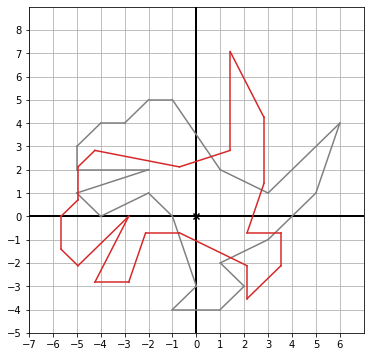

In [11]:
# rotates the dinosaur counterclockwise
rotation_angle = pi / 4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(Polygon(*dino_vectors, color=gray), Polygon(*dino_rotated, color=red))

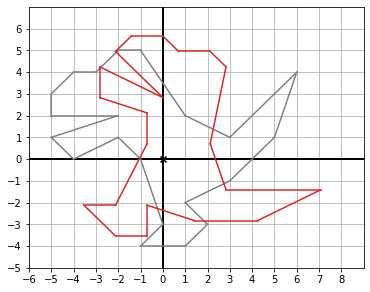

In [12]:
# rotates the dinosaur clockwise
rotation_angle = pi / 4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle - rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(Polygon(*dino_vectors, color=gray), Polygon(*dino_rotated, color=red))

## Combining vector transformations

So far, we’ve seen how to translate, rescale, and rotate vectors. **Applying any of these transformations to a collection of vectors achieves the same effect on the shape that these define in the plane. The full power of these vector transformations comes when we apply them in sequence.**

For instance, we could first rotate and then translate the dinosaur. Using the
translate function and the rotate function, we can write such a transformation concisely.

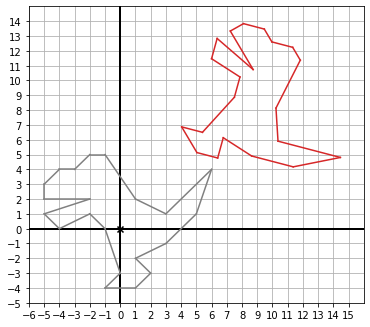

In [21]:
new_dino = translate((8, 8), rotate(5 * pi / 3, dino_vectors))

draw(Polygon(*dino_vectors, color=gray), Polygon(*new_dino, color=red))

The rotation comes first, turning the dinosaur counterclockwise by $5 \pi/3$, which is most of a full counterclockwise revolution. Then the dinosaur is translated up and to the right by 8 units each. 

As you can imagine, combining rotations and translations appropriately can move the dinosaur (or any shape) to any desired location and orientation
in the plane. Whether we’re animating our dinosaur in a movie or in a game,
the flexibility to move it around with vector transformations lets us give it life programmatically.

## Exercises

**Ex-2.43**: Create a function regular_polygon(n) that returns Cartesian
coordinates for the vertices of a regular n-sided polygon (that is, having all
angles and side lengths equal). For instance, polygon(7) produces vectors
defining the following heptagon:

In [ ]:
def regular_polygon(n):
  return [to_cartesian((1, 2 * pi * k / n)) for k, in range(0, n)]

# reg_poly = regular_polygon(7)

draw(Polygon(7))

**Ex-2.44**: What is the result of first translating the dinosaur by the vector
(8, 8) and then rotating it by $5 \pi/3$? Is the result the same as rotating and then translating?

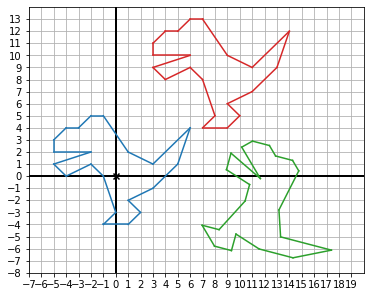

In [29]:
tanslated_dino = translate((8, 8), dino_vectors)
rotated_dino = rotate(5 * pi / 3, tanslated_dino)

draw(Polygon(*dino_vectors, color=blue), Polygon(*tanslated_dino, color=red), Polygon(*rotated_dino, color=green))

The result is not the same. In general, applying rotations and translations in different orders yields different results.